In [1]:
from funciones_prueba import mapa_estaciones, generar_analisis_mensual, generar_series, calcular_matriz_calidad_2, extraer_datos_climatologicos, mapa_estaciones, reporte_calidad, ajustar_inconsistencias, contar_anomalias_especificas,encontrar_maximo_datos_nulos, generar_boxplot, generar_histogramas_redondeo 
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import matplotlib.pyplot as plt
from datetime import datetime
import shutil
import seaborn as sns 

ModuleNotFoundError: No module named 'funciones_prueba'

In [2]:
# Definición de parámetros:

#Ejemplos: /Users/DiegoRB/Desktop/Proyectos/EM_Mex/SHPs/area_estudio/cuencas_ago17.shp, /Users/DiegoRB/Desktop/INDERS/Proyectos/Agroparque_Durango/Capas/poligonal_preliminar/polig_pre.shp

## Ruta al área de interés en formato shp
shp_path = "/Users/DiegoRB/Desktop/7º 2/Manejo Integral de Cuencas/Cuenca/AOI/AOI/Cuenca_zacapu.shp"  # Asegúrate de que el SHP esté en WGS84
## Ruta a la base de datos de archivos TXT de CONAGUA
carpeta_datos = "/Users/DiegoRB/Desktop/Proyectos/EM_Mex/txts"
## Ruta al metadato de los archivos TXT de CONAGUA
df_metadatos = pd.read_csv("/Users/DiegoRB/Desktop/Proyectos/EM_Mex/Metadatos/metadatos_final_2.csv")
## Fehcas de inicio y fin del análisis
fecha_inicio = pd.to_datetime("1990-12-01")
fecha_fin = pd.to_datetime("2020-12-31")
## Estaciones en operación o suspendidas?
estado_operacion = 1  # 1 para estaciones operando, 0 para suspendidas agregaar ambas

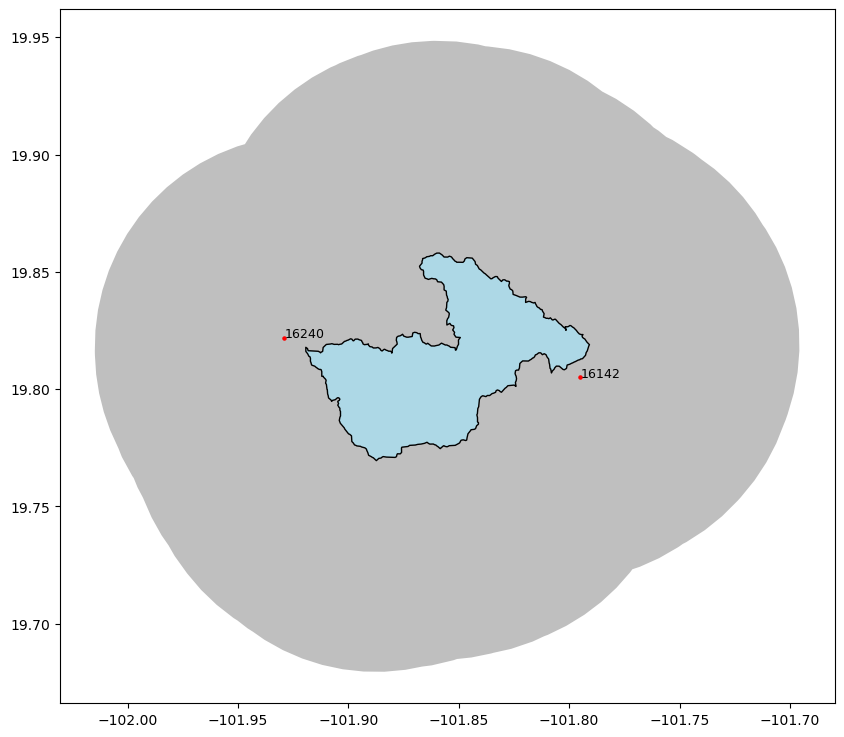

In [3]:
mapa_estaciones (shp_path, df_metadatos, 1, "14N", True, 10000)

In [4]:
shp_path_f = "/Users/DiegoRB/Desktop/7º 2/Manejo Integral de Cuencas/Cuenca/AOI/AOI/AOI_buffer.shp"

# Llamar a la función
resultados_calidad_df, file_paths = calcular_matriz_calidad_2 (shp_path_f, df_metadatos, carpeta_datos, fecha_inicio, fecha_fin, estado_operacion)
# Imprimir o analizar el DataFrame df_calidad
print(resultados_calidad_df)

/Users/DiegoRB/anaconda3/envs/ems_conagua/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


  estacion_id        nombre fecha_inicial_datos fecha_final_datos  \
0       16142  ZACAPU (DGE)          1990-12-01        2020-07-09   
1       16240   EL PUEBLITO          1994-07-28        2018-09-30   

   completitud_precip  completitud_evap  completitud_tmax  completitud_tmin  
0           99.874983         89.665231         98.346993         98.124740  
1          100.000000         55.579316         63.199844         62.908243  


In [5]:
file_paths

['/Users/DiegoRB/Desktop/Proyectos/EM_Mex/txts/dia16142.TXT',
 '/Users/DiegoRB/Desktop/Proyectos/EM_Mex/txts/dia16240.TXT']

In [6]:
file_paths = ['/Users/DiegoRB/Desktop/Proyectos/EM_Mex/txts/dia16142.TXT',
 '/Users/DiegoRB/Desktop/Proyectos/EM_Mex/txts/dia16240.TXT']

In [6]:
# Ejemplo de uso
output_dir = "/Users/DiegoRB/Desktop/7º 2/Manejo Integral de Cuencas/Cuenca/AOI/EMs"
reporte_calidad(file_paths, output_dir)

Procesando archivos:  50%|████████████            | 1/2 [00:13<00:13, 13.78s/it]

Reporte de calidad generado con éxito: /Users/DiegoRB/Desktop/7º 2/Manejo Integral de Cuencas/Cuenca/AOI/EMs/reportes/reporte_calidad_dia16142.txt


Procesando archivos: 100%|████████████████████████| 2/2 [00:27<00:00, 13.57s/it]

Reporte de calidad generado con éxito: /Users/DiegoRB/Desktop/7º 2/Manejo Integral de Cuencas/Cuenca/AOI/EMs/reportes/reporte_calidad_dia16240.txt


In [3]:
tabla_resumen("/Users/DiegoRB/Desktop/Proyectos/EM_Mex/pruebas/datos_procesados","/Users/DiegoRB/Desktop/Proyectos/EM_Mex/Metadatos/metadatos_final_2.csv", "/Users/DiegoRB/Desktop/Proyectos/EM_Mex/pruebas/Prueba_shp")

Columnas originales en dia13008_procesados.csv: ['Mes', 'Fecha', 'Precip', 'Evap', 'TMax', 'TMin', 'Año']
Error: "['Precip_Acumulada', 'Temp_Media', 'TMin_Media', 'TMax_Media'] not in index" en el archivo dia13008_procesados.csv
Columnas originales en dia13004_procesados.csv: ['Mes', 'Fecha', 'Precip', 'Evap', 'TMax', 'TMin', 'Año']
Error: "['Precip_Acumulada', 'Temp_Media', 'TMin_Media', 'TMax_Media'] not in index" en el archivo dia13004_procesados.csv
Columnas originales en dia13002_procesados.csv: ['Mes', 'Fecha', 'Precip', 'Evap', 'TMax', 'TMin', 'Año']
Error: "['Precip_Acumulada', 'Temp_Media', 'TMin_Media', 'TMax_Media'] not in index" en el archivo dia13002_procesados.csv
Columnas originales en dia29010_procesados.csv: ['Mes', 'Fecha', 'Precip', 'Evap', 'TMax', 'TMin', 'Año']
Error: "['Precip_Acumulada', 'Temp_Media', 'TMin_Media', 'TMax_Media'] not in index" en el archivo dia29010_procesados.csv
Columnas originales en dia29004_procesados.csv: ['Mes', 'Fecha', 'Precip', 'Evap', '

In [5]:
## Control de calidad de datos
## Datos perdidos (missing data)
## Homogenización de datos 
## Imputación de datos (revisar R) ---->  Warning
## IDW o Kriging
## Modular y avisando que se están registrando problemas
## Tendencia de los datos 

ERROR: Could not find a version that satisfies the requirement ace_tools (from versions: none)
ERROR: No matching distribution found for ace_tools
